In [3]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from joblib import dump, load

badminton

In [4]:
badminton_data = pd.read_csv(r'/Users/vamsi/Downloads/sentimental analysis/reviews_data_dump/reviews_badminton/data.csv')
badminton_data

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [5]:
#checking for dtypes and missing values in every column 
badminton_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [6]:
#removing the rows which have atleast 6 missing values in the rows 
badminton_data.dropna(thresh=6,inplace=True)
badminton_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8508 entries, 0 to 8507
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8508 non-null   object 
 7   Ratings          8508 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 598.2+ KB


In [7]:
#replacing the nan values with 'Unknown' in 'place of Review' columns and 'Not Specified' in 'Month' cloumn
badminton_data['Place of Review'].fillna('Unknown', inplace=True)
badminton_data['Month'].fillna('Not Specified', inplace=True)
badminton_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8508 entries, 0 to 8507
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8508 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8508 non-null   object 
 6   Review text      8508 non-null   object 
 7   Ratings          8508 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 598.2+ KB


In [8]:
# Removing 'Certified Buyer' common word from the 'place of review' column
badminton_data['Place of Review'] = badminton_data['Place of Review'].apply(lambda x: x.split(',')[-1])

In [9]:
# As all the nan values are dealt with, we can now start the analysis of the data.
# Our focus is on customer satisfaction or dissatisfaction of the product features.

In [10]:
badminton_data

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,Chirakkal,889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,Hyderabad,109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,Dharmapuri,42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,Chennai,25.0,1.0,Not Specified,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,Unknown,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8503,darwin,Yones Mavis 350 Blue cap,Unknown,2.0,0.0,Apr 2016,Wrost and duplicate productDon't buy this sell...,1
8504,naresh g,For Mavis350,Unknown,2.0,1.0,Aug 2016,Received product intact and sealedREAD MORE,5
8505,MD. Jabbar,Very Good,Unknown,1.0,0.0,Sep 2016,Delivered before time but price is high from m...,3
8506,Abani Behera,Don't waste your money,Unknown,0.0,2.0,Sep 2016,up to the mark but same is available in market...,4


In [ ]:
place_ratings = badminton_data[['Place of Review','Ratings']].groupby('Place of Review')['Ratings'].value_counts().unstack(fill_value=0)
places = badminton_data['Place of Review'].unique()

# Setting up subplots
num_places = len(places)
print(num_places)
num_cols = 3  # Adjust the number of columns based on your preference
num_rows = (num_places + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Plotting for each place
for i, place in enumerate(places):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    place_data = place_ratings.loc[place]
    place_data.plot(kind='bar', ax=ax, stacked=True)
    ax.set_title(f'Ratings for {place}')
    ax.set_xlabel('Ratings')
    ax.set_ylabel('Number of Ratings')

# Adjust layout
plt.tight_layout()
plt.show()

2338


ValueError: Image size of 1500x390000 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 1500x390000 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1500x390000 with 2340 Axes>

In [11]:
#removing 'READ MORE' word from review text column. 
badminton_data['Review text'] = badminton_data['Review text'].apply(lambda x: x.replace('READ MORE',''))

In [12]:
#considering ratings 1,2 as dissatisfaction and 4,5 as satisfaction for the analysis
negitive_review = badminton_data[(badminton_data.Ratings == 1) | (badminton_data.Ratings==2)]
postive_review = badminton_data[(badminton_data.Ratings == 4) | (badminton_data.Ratings==5)]

In [13]:
#initalizing the TfidfVectorizer object 
vectorizer = TfidfVectorizer()

In [14]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [15]:
postive_review['Review text'] = postive_review['Review text'].apply(remove_stopwords)
postive_vectorizer = vectorizer.fit_transform(postive_review['Review text'])
postive_df = pd.DataFrame(postive_vectorizer.toarray(),columns=vectorizer.get_feature_names_out())
postive_words = postive_df.mean().sort_values(ascending=False)
postive_words

/var/folders/th/h51p5px161nfsptgmmpdzq_c0000gn/T/ipykernel_1691/2066817002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  postive_review['Review text'] = postive_review['Review text'].apply(remove_stopwords)


good           0.248755
nice           0.117050
product        0.111229
quality        0.060726
super          0.039565
                 ...   
requirement    0.000019
each           0.000019
represents     0.000019
consists       0.000019
costs          0.000019
Length: 2184, dtype: float64

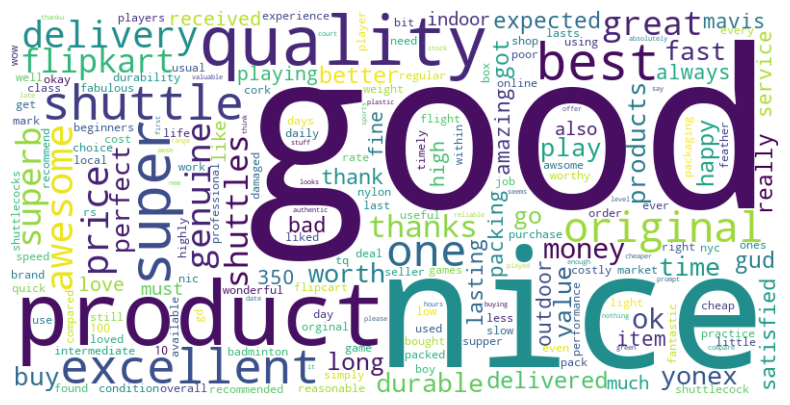

In [16]:
most_used_positive_words = postive_words.reset_index().set_index('index').to_dict()[0]
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(most_used_positive_words)
# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
negitive_tfidf_vectorizer = TfidfVectorizer()
negitive_review['Review text'] = negitive_review['Review text'].apply(remove_stopwords)
negitive_vectorizer = negitive_tfidf_vectorizer.fit_transform(negitive_review['Review text'])
negitive_df = pd.DataFrame(negitive_vectorizer.toarray(),columns=negitive_tfidf_vectorizer.get_feature_names_out())
negitive_words = negitive_df.mean().sort_values(ascending=False)
negitive_words

/var/folders/th/h51p5px161nfsptgmmpdzq_c0000gn/T/ipykernel_1691/963292206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negitive_review['Review text'] = negitive_review['Review text'].apply(remove_stopwords)


quality    0.110779
bad        0.100716
good       0.100019
product    0.072768
poor       0.051792
             ...   
along      0.000161
tape       0.000150
image      0.000150
attach     0.000150
doubles    0.000150
Length: 1261, dtype: float64

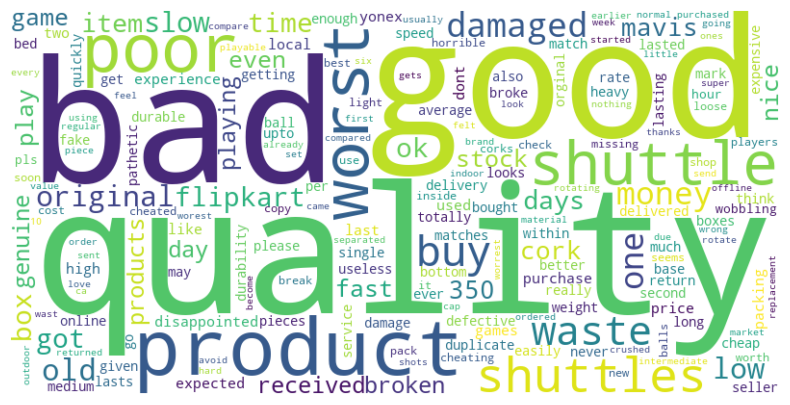

In [18]:
most_used_negitive_words = negitive_words.reset_index().set_index('index').to_dict()[0]
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(most_used_negitive_words)
# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
badminton_data

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,Chirakkal,889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,Hyderabad,109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,Dharmapuri,42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,Chennai,25.0,1.0,Not Specified,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,Unknown,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8503,darwin,Yones Mavis 350 Blue cap,Unknown,2.0,0.0,Apr 2016,Wrost and duplicate productDon't buy this sell...,1
8504,naresh g,For Mavis350,Unknown,2.0,1.0,Aug 2016,Received product intact and sealed,5
8505,MD. Jabbar,Very Good,Unknown,1.0,0.0,Sep 2016,Delivered before time but price is high from m...,3
8506,Abani Behera,Don't waste your money,Unknown,0.0,2.0,Sep 2016,up to the mark but same is available in market...,4


In [20]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
def preprocess(raw_text, flag):
    text = re.sub("[^a-zA-Z]", " ", raw_text)
    text = text.lower()
    words = word_tokenize(text)              
    words = [word for word in words if word not in stopwords.words("english")]
    if(flag == 'stem'):
        words = [stemmer.stem(word) for word in words]
    else:
        words = [lemmatizer.lemmatize(word) for word in words]
    preprocessed_text = " ".join(words)
    #words_in_preprocessed_text = len(words)
    
    return pd.Series([preprocessed_text])

In [21]:
badminton_data['Review text_stem'] = badminton_data['Review text'].apply(lambda x : preprocess(x, 'stem'))
badminton_data['Review text_lemma'] = badminton_data['Review text'].apply(lambda x : preprocess(x, 'lemma'))

In [22]:
badminton_data

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,Review text_stem,Review text_lemma
0,Kamal Suresh,Nice product,Chirakkal,889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,nice product good qualiti price rise bad sign ...,nice product good quality price rising bad sig...
1,Flipkart Customer,Don't waste your money,Hyderabad,109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,suppli yonex mavi outsid cover yonex ad insid ...,supplied yonex mavis outside cover yonex ad in...
2,A. S. Raja Srinivasan,Did not meet expectations,Dharmapuri,42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,worst product damag shuttlecock pack new box o...,worst product damaged shuttlecock packed new b...
3,Suresh Narayanasamy,Fair,Chennai,25.0,1.0,Not Specified,"Quite O. K. , but nowadays the quality of the...",3,quit k nowaday qualiti cork like year back use...,quite k nowadays quality cork like year back u...
4,ASHIK P A,Over priced,Unknown,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1,pricedjust retail understand wat advantag buy ...,pricedjust retailer understand wat advantage b...
...,...,...,...,...,...,...,...,...,...,...
8503,darwin,Yones Mavis 350 Blue cap,Unknown,2.0,0.0,Apr 2016,Wrost and duplicate productDon't buy this sell...,1,wrost duplic productdon buy seller productflip...,wrost duplicate productdon buy seller productf...
8504,naresh g,For Mavis350,Unknown,2.0,1.0,Aug 2016,Received product intact and sealed,5,receiv product intact seal,received product intact sealed
8505,MD. Jabbar,Very Good,Unknown,1.0,0.0,Sep 2016,Delivered before time but price is high from m...,3,deliv time price high market,delivered time price high market
8506,Abani Behera,Don't waste your money,Unknown,0.0,2.0,Sep 2016,up to the mark but same is available in market...,4,mark avail market less price,mark available market le price


In [23]:
dataset1 = badminton_data[['Review text','Ratings']]
dataset2 = badminton_data[['Review text_stem','Ratings']]
dataset3 = badminton_data[['Review text_lemma','Ratings']]
review_train1, review_test1 = train_test_split(dataset1, train_size=6000, random_state=1)
review_train2, review_test2 = train_test_split(dataset2, train_size=6500, random_state=1)
review_train3, review_test3 = train_test_split(dataset3, train_size=6500, random_state=1)

In [24]:
# Create TF-IDF vectorizer
tfidf_vectorizer1 = TfidfVectorizer()
tfidf_vectorizer2 = TfidfVectorizer()
tfidf_vectorizer3  = TfidfVectorizer()
# Fit and transform training data
review_train_tfidf1 = tfidf_vectorizer1.fit_transform(review_train1['Review text'])
review_train_tfidf2 = tfidf_vectorizer2.fit_transform(review_train2['Review text_stem'])
review_train_tfidf3= tfidf_vectorizer3.fit_transform(review_train3['Review text_lemma'])
# Transform testing data
review_test_tfidf1 = tfidf_vectorizer1.transform(review_test1['Review text'])
review_test_tfidf2 = tfidf_vectorizer2.transform(review_test2['Review text_stem'])
review_test_tfidf3 = tfidf_vectorizer3.transform(review_test3['Review text_lemma'])

In [25]:
model1 = KNeighborsClassifier(metric='cosine').fit(review_train_tfidf1, review_train1['Ratings'])
model2 = KNeighborsClassifier(metric='cosine').fit(review_train_tfidf2, review_train2['Ratings'])
model3 = KNeighborsClassifier(metric='cosine').fit(review_train_tfidf3, review_train3['Ratings'])
model1.fit(review_train_tfidf1, review_train1['Ratings'])
model2.fit(review_train_tfidf2, review_train2['Ratings'])
model3.fit(review_train_tfidf3, review_train3['Ratings'])

KNeighborsClassifier(metric='cosine')

In [26]:
# Predict on testing data
y_pred1 = model1.predict(review_test_tfidf1)
y_pred2 = model2.predict(review_test_tfidf2)
y_pred3 = model3.predict(review_test_tfidf3)

/Users/vamsi/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [27]:
# Calculate accuracy
accuracy1 = accuracy_score(review_test1['Ratings'], y_pred1)
accuracy2 = accuracy_score(review_test2['Ratings'], y_pred2)
accuracy3 = accuracy_score(review_test3['Ratings'], y_pred3)
print("Accuracy1:", round(accuracy1*100,3))
print("Accuracy2:", round(accuracy2*100,3))
print("Accuracy3:", round(accuracy3*100,3))

Accuracy1: 60.526
Accuracy2: 54.133
Accuracy3: 58.317


In [28]:
model4 = LogisticRegression().fit(review_train_tfidf1, review_train1['Ratings'])
model5 = LogisticRegression().fit(review_train_tfidf2, review_train2['Ratings'])
model6 = LogisticRegression().fit(review_train_tfidf3, review_train3['Ratings'])

/Users/vamsi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vamsi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

In [29]:
model4.fit(review_train_tfidf1, review_train1['Ratings'])
model5.fit(review_train_tfidf2, review_train2['Ratings'])
model6.fit(review_train_tfidf3, review_train3['Ratings'])

/Users/vamsi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vamsi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

LogisticRegression()

In [30]:
y_pred4 = model4.predict(review_test_tfidf1)
y_pred5 = model5.predict(review_test_tfidf2)
y_pred6 = model6.predict(review_test_tfidf3)

In [31]:
print(accuracy_score(review_test1['Ratings'], y_pred4))
print(accuracy_score(review_test2['Ratings'], y_pred5))
print(accuracy_score(review_test3['Ratings'], y_pred6))

0.6622807017543859
0.6523904382470119
0.647410358565737


In [32]:
dump(model1, '/Users/vamsi/Downloads/sentimental analysis/reviews_data_dump/model_r_knn.joblib')
dump(model2, '/Users/vamsi/Downloads/sentimental analysis/reviews_data_dump/model_s_knn.joblib')
dump(model3, '/Users/vamsi/Downloads/sentimental analysis/reviews_data_dump/model_l_knn.joblib')
dump(model4, '/Users/vamsi/Downloads/sentimental analysis/reviews_data_dump/model_r_log.joblib')
dump(model5, '/Users/vamsi/Downloads/sentimental analysis/reviews_data_dump/model_s_log.joblib')
dump(model6, '/Users/vamsi/Downloads/sentimental analysis/reviews_data_dump/model_l_log.joblib')

['/Users/vamsi/Downloads/sentimental analysis/reviews_data_dump/model_l_log.joblib']

In [33]:
dump(tfidf_vectorizer1,'/Users/vamsi/Downloads/sentimental analysis/reviews_data_dump/tfidf1.joblib')
dump(tfidf_vectorizer2,'/Users/vamsi/Downloads/sentimental analysis/reviews_data_dump/tfidf2.joblib')
dump(tfidf_vectorizer3,'/Users/vamsi/Downloads/sentimental analysis/reviews_data_dump/tfidf3.joblib')

['/Users/vamsi/Downloads/sentimental analysis/reviews_data_dump/tfidf3.joblib']